# Euler逼近

我们使用如下代码抽象化Euler逼近的过程：

In [1]:
class EulerApproximation():
    """
    Euler逼近的抽象类，对随机过程：
        dX_t=a(t,X_t)dt+b(t,X_t)dB_t
    进行逼近，其中B_t为标准布朗运动。
    初始化需要的参数：
        T：       时间长度
        x0：      初始点
        num_path：路径的条数，默认为1条
        N：       离散化之后总共的步数
        Delta：   时间间隔
        seed：    设定seed，默认不设定
    其中N和Delta只能给其中一个。
    使用时需要重载a(t,x)和b(t,x)函数。
    """
    def __init__(self, T, x0=0.0, num_path=1, N=0, Delta=0.0, seed=-1):
        self.T=T
        self.num_path=num_path
        self.x0=x0
        if N!=0:
            self.N=N
            self.Delta=T/N
        elif Delta!=0:
            self.Delta=Delta
            self.N=T/Delta
        else:
            raise ValueError("至少设定N和Delta中的一个。")
        import numpy as np
        import numpy.random as nprd
        self.np=np
        self.nprd=nprd
        if seed>=0:
            nprd.seed(seed)
    def a(self, t,x):
        return 0
    def b(self, t,x):
        return 1
    def simulate(self):
        """
        返回结果为一个列表，第一个元素为时间划分，第二个元素开始为模拟的路径
        """
        Paths=[]
        t=self.np.array([j*self.Delta for j in range(self.N)])
        Paths.append(t)
        sqrtDelta=self.np.sqrt(self.Delta)
        for i in range(self.num_path):
            path=self.np.zeros(self.N)
            dB=self.nprd.normal(0,sqrtDelta,self.N)
            for j in range(self.N):
                if j==0:
                    path[0]=self.x0
                else:
                    path[j]=path[j-1]+self.a(t[j-1],path[j-1])*self.Delta+self.b(t[j-1],path[j-1])*dB[j-1]
            Paths.append(path)
        return Paths

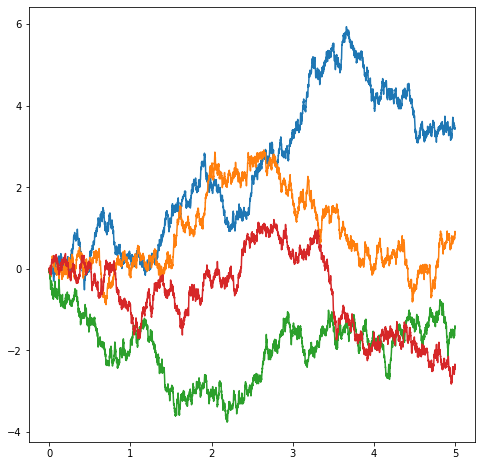

In [2]:
## 模拟Ornstein-Uhlenbeck模型
approximater=EulerApproximation(5,N=5000, x0=0, num_path=5)
mu=-0.2
sigma=1.414
def a(t,x):
    return mu*x
def b(t,x):
    return sigma
approximater.a=a
approximater.b=b
paths=approximater.simulate()
import matplotlib.pyplot as plt 
%matplotlib inline

# 设定图像大小
plt.rcParams['figure.figsize'] = (8.0, 8.0)
fig=plt.figure()
for i in range(4):
    plt.plot(paths[0],paths[i+1])
plt.show() ## 画图
fig.savefig("Ornstein-Uhlenbeck.eps")

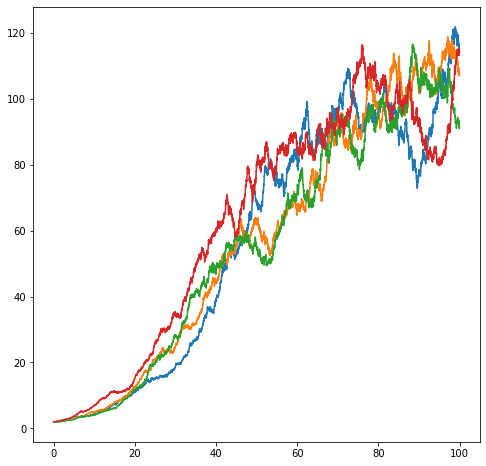

In [3]:
## 模拟随机的Logistic增长模型
approximater=EulerApproximation(100,N=5000, x0=2, num_path=5)
K=100
sigma=0.05
r=0.1
def a(t,x):
    return r*(K-x)/K*x
def b(t,x):
    return sigma*x
approximater.a=a
approximater.b=b
paths=approximater.simulate()
import matplotlib.pyplot as plt 
%matplotlib inline

# 设定图像大小
plt.rcParams['figure.figsize'] = (8.0, 8.0)
fig=plt.figure()
for i in range(4):
    plt.plot(paths[0],paths[i+1])
plt.show() ## 画图
fig.savefig("Stochastic_Logistic.eps")